In [1]:
from MRF_2 import *
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/Datasets/abalone.csv")

In [4]:
data_in = data_in.iloc[:, 1:]

In [5]:
data_in = data_in.fillna(method = 'ffill')

In [6]:
data_in.isnull().any() 

0.455     False
0.365     False
0.095     False
0.514     False
0.2245    False
0.101     False
0.15      False
15        False
dtype: bool

In [7]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,4), B = 50, mtry_frac=0.25, oos_pos=np.arange(3999,4176), trend_push=4,quantile_rate=0.3, print_b = True)

In [8]:
mrf_output = MRF._ensemble_loop()

Tree 1 out of 50


TypeError: _splitter_mrf() missing 1 required positional argument: 'rw_regul_data'

In [ ]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [ ]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions_abalone.csv", index_col = "Unnamed: 0")

In [ ]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [ ]:
phils_preds.columns = my_preds.columns

In [ ]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF_betas_abalone.csv", index_col = "Unnamed: 0")

In [ ]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
phils_betas.index = my_betas.index

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3
count,4.154000e+03,4154.000000,4154.000000,4.154000e+03
mean,3.392853e-02,0.087918,0.079118,1.048366e-02
std,3.401559e-02,0.075039,0.067745,8.657504e-03
min,3.004538e-07,0.000091,0.000047,7.214933e-07
25%,9.577798e-03,0.030871,0.028915,3.997291e-03
50%,2.261001e-02,0.068404,0.062547,8.463754e-03
75%,4.808836e-02,0.121749,0.110594,1.477631e-02
max,2.651015e-01,0.532072,0.623083,6.810876e-02


Text(0.5, 0.98, '50 iterations on the Abalone Dataset: betas from Python and R implementation. Python (light) and R (dark) colors.')

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

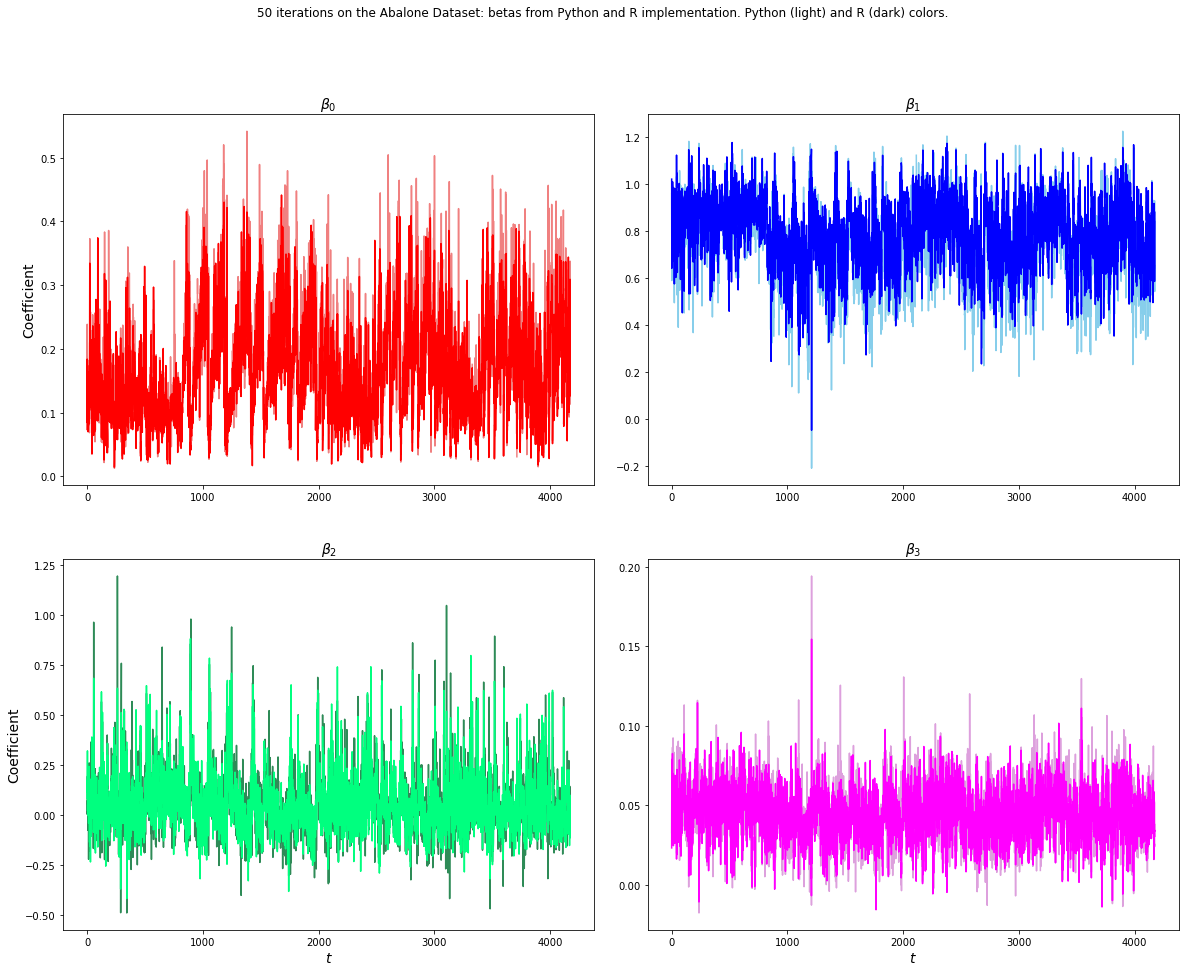

In [ ]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("50 iterations on the Abalone Dataset: betas from Python and R implementation. Python (light) and R (dark) colors.", )

plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])

ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])

ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])

ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])
ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])


ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [ ]:
mrf_output.keys()

dict_keys(['YandX', 'pred_ensemble', 'pred', 'S_names', 'betas', 'betas_draws_raw', 'betas_draws', 'model'])

Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, '50 iterations of the Abalone dataset: R versus Python implementation, average of forecasts')

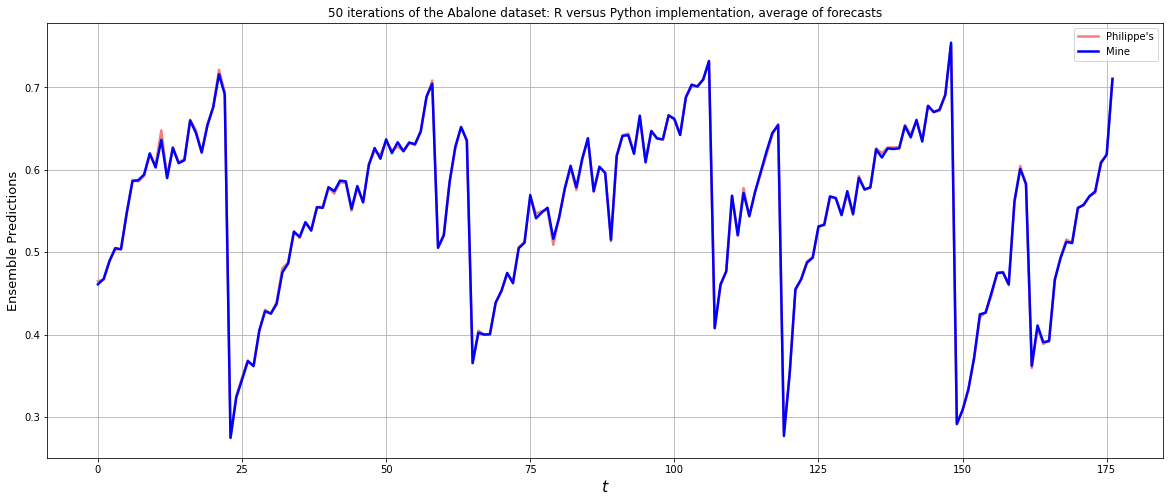

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("50 iterations of the Abalone dataset: R versus Python implementation, average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)